# Data Project - Stock Market Analysis

Addressing...  
1.) What was the change in price of the stock over time?  
2.) What was the daily return of the stock on average?  
3.) What was the moving average of the various stocks?  
4.) What was the correlation between different stocks'?  
5.) How much value do we put at risk by investing in a particular stock?  
6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

### 1. Change in price of the stock overtime

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# for reading stock data
from pandas_datareader.data import DataReader

# for time stamps
from datetime import datetime

In [4]:
# list of stocks to use for analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# set End and Start time
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# grab yahoo finance data and set as dataframe
for stock in tech_list:
  # Set DataFrame as the Stock ticker
  globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [6]:
# exploring through AAPL
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,102.702135,99.724170,101.227075,101.263014,1.544318e+08,100.882342
std,24.127057,23.658836,24.077564,23.879313,7.129797e+07,23.987948
min,57.125000,53.152500,57.020000,56.092499,4.669130e+07,55.661041
25%,79.922501,78.652496,79.169998,79.212502,1.036256e+08,78.815979
50%,111.489998,107.720001,109.377502,109.375000,1.372504e+08,109.023705
75%,121.989998,118.809998,120.070000,120.709999,1.846420e+08,120.322304
max,145.089996,141.369995,143.600006,143.160004,4.268848e+08,142.946396


In [7]:
# general info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-02-11 to 2021-02-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


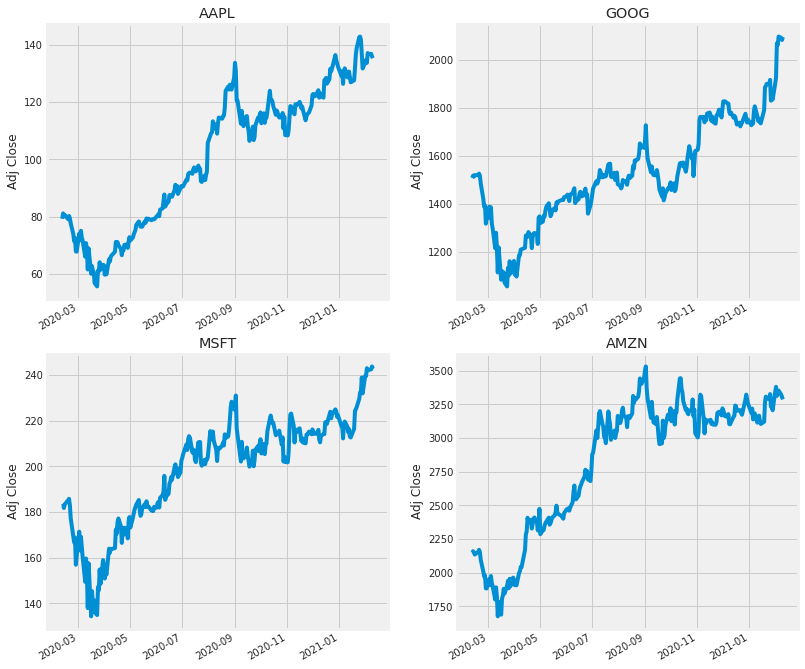

In [13]:
company_list = [AAPL, GOOG, MSFT, AMZN]

# lets see the closing prices
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

# enumerate(company_list, 1), start from 1
for i, company in enumerate(company_list):
  plt.subplot(2, 2, i+1)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f"{tech_list[i]}")

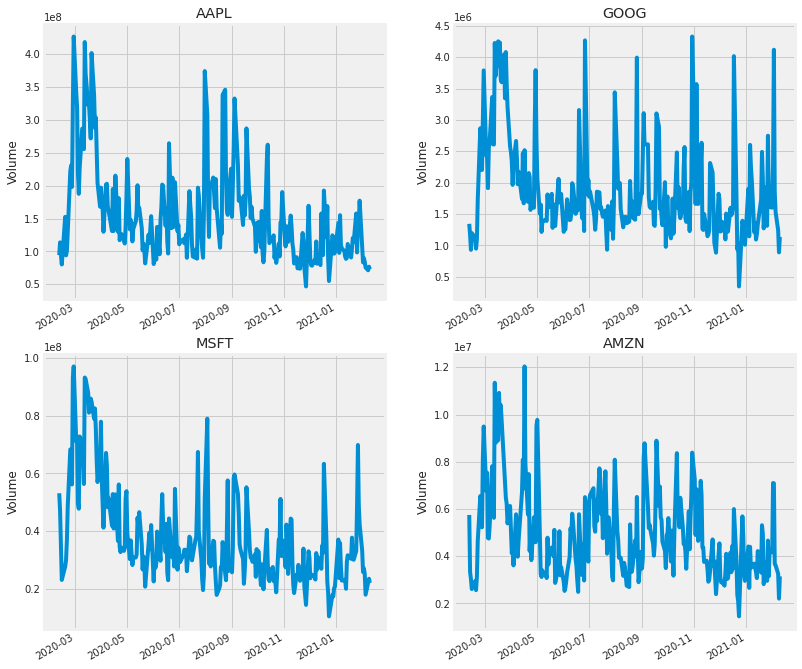

In [14]:
# traded volume
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list):
  plt.subplot(2, 2, i+1)
  company['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f"{tech_list[i]}")

### 2. Moving average of the various stocks

In [15]:
ma_day = [10, 20, 50]

for ma in ma_day:
  for company in company_list:
    column_name = f"MA for {ma} days"
    company[column_name] = company["Adj Close"].rolling(ma).mean()

In [16]:
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'MA for 10 days',
       'MA for 20 days', 'MA for 50 days'],
      dtype='object')


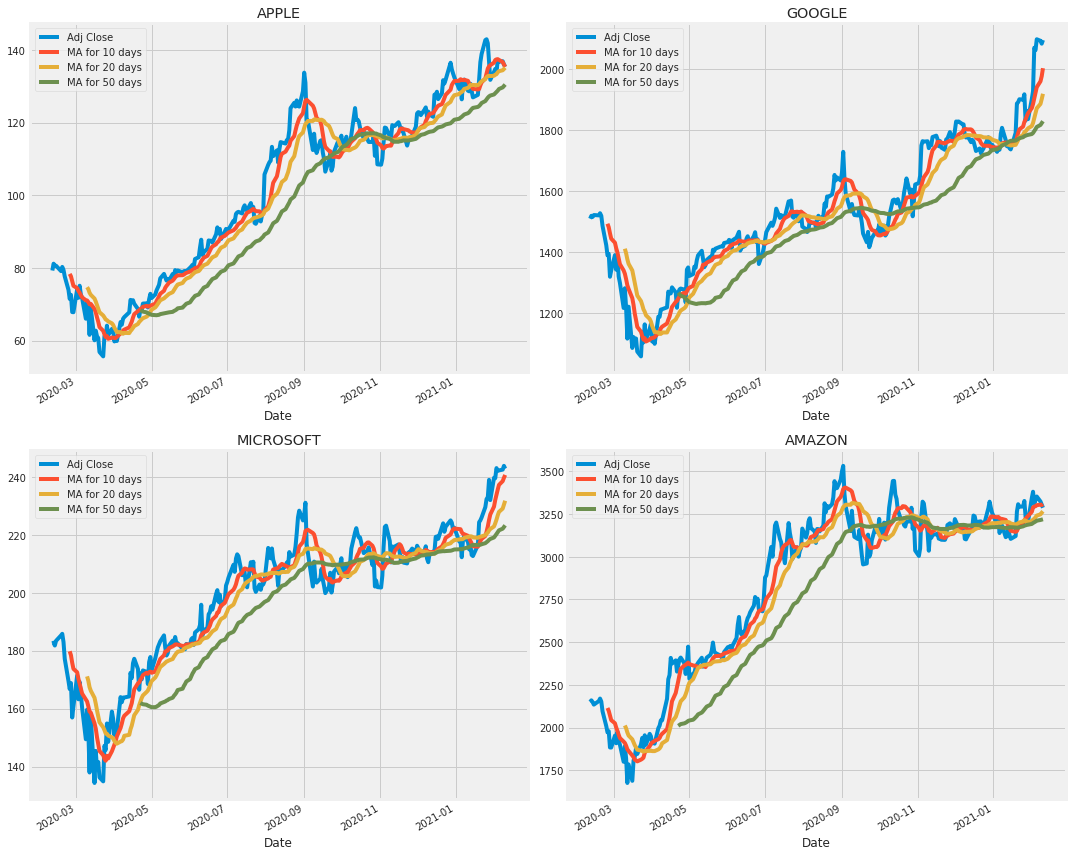

In [21]:
# plot moving averages
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

### 3. Daily reutrn of the stock


In [22]:
# get percent change for each day
for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change()

In [23]:
AAPL.head(10)

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2020-02-11,80.974998,79.677498,80.900002,79.902496,94323200.0,79.287888,NaN,NaN,NaN,NaN
2020-02-12,81.805000,80.367500,80.367500,81.800003,113730400.0,81.170799,NaN,NaN,NaN,0.023748
2020-02-13,81.555000,80.837502,81.047501,81.217499,94747600.0,80.592773,NaN,NaN,NaN,-0.007121
2020-02-14,81.495003,80.712502,81.184998,81.237503,80113600.0,80.612625,NaN,NaN,NaN,0.000246
2020-02-18,79.937500,78.652496,78.839996,79.750000,152531200.0,79.136566,NaN,NaN,NaN,-0.018311
2020-02-19,81.142502,80.000000,80.000000,80.904999,93984000.0,80.282684,NaN,NaN,NaN,0.014483
2020-02-20,81.162498,79.552498,80.657501,80.074997,100566000.0,79.459068,NaN,NaN,NaN,-0.010259
2020-02-21,80.112503,77.625000,79.654999,78.262497,129554000.0,77.660507,NaN,NaN,NaN,-0.022635
2020-02-24,76.044998,72.307503,74.315002,74.544998,222195200.0,73.971603,NaN,NaN,NaN,-0.047500


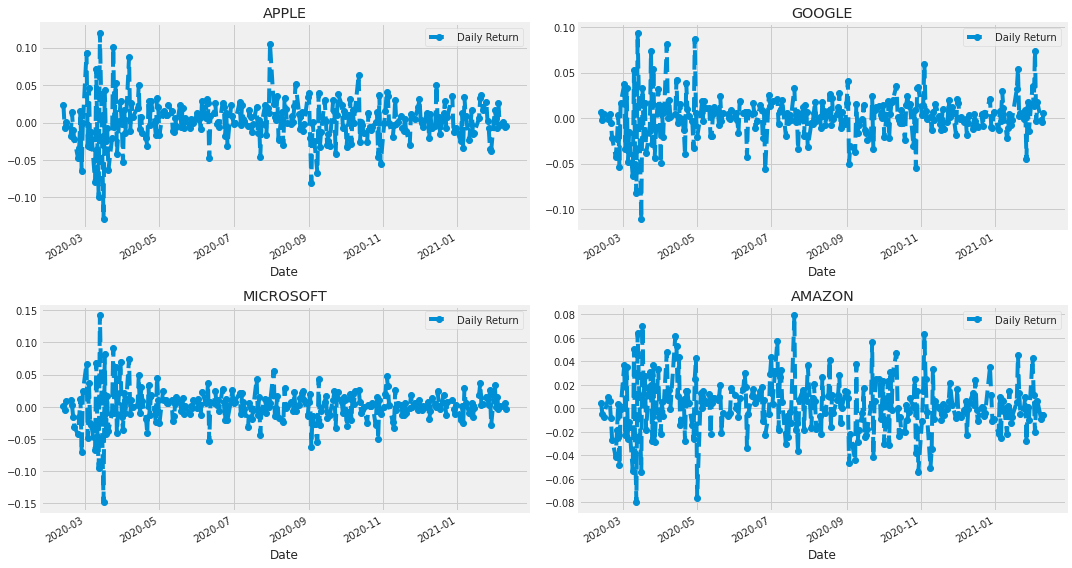

In [28]:
# plot daily change
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL["Daily Return"].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title("APPLE")

GOOG["Daily Return"].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title("GOOGLE")

MSFT["Daily Return"].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title("MICROSOFT")

AMZN["Daily Return"].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title("AMAZON")

fig.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

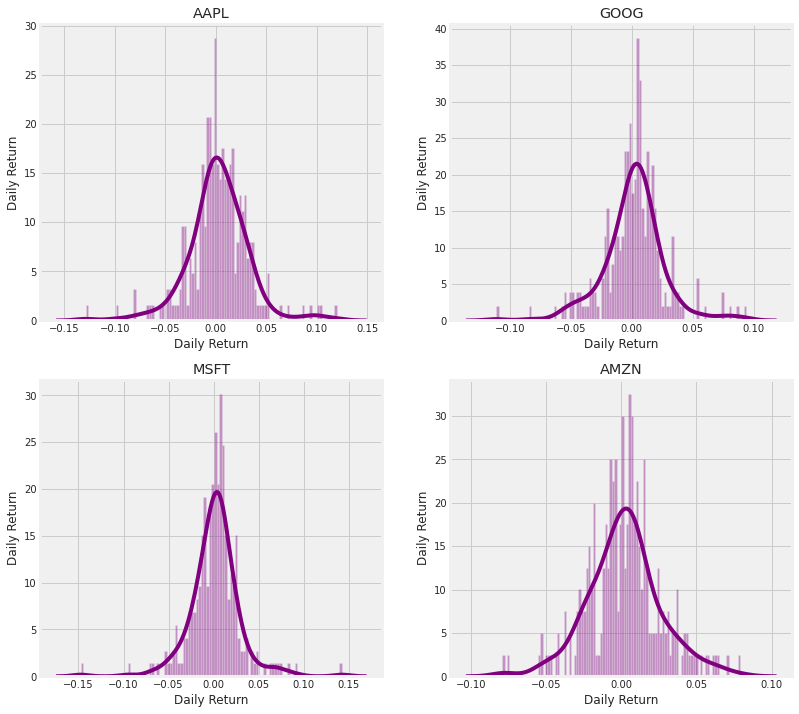

In [33]:
# get histogram of returns
# note seaborn cant read NaN
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list):
  plt.subplot(2, 2, i+1)
  sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
  plt.ylabel('Daily Return')
  plt.title(f'{tech_list[i]}')


### Correlation between stocks

In [37]:
# grab alll list
tech_list = ["aapl", "goog", "msft", "amzn"]
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# quick look
closing_df.head()

Symbols,aapl,goog,msft,amzn
Date,,,,
2020-02-11,79.287888,1508.790039,182.506607,2150.800049
2020-02-12,81.170799,1518.270020,182.773773,2160.000000
2020-02-13,80.592773,1514.660034,181.784271,2149.870117
2020-02-14,80.612625,1520.739990,183.407059,2134.870117
2020-02-18,79.136566,1519.670044,185.267365,2155.669922


In [38]:
# make percent change dataframe
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,aapl,goog,msft,amzn
Date,,,,
2020-02-11,NaN,NaN,NaN,NaN
2020-02-12,0.023748,0.006283,0.001464,0.004277
2020-02-13,-0.007121,-0.002378,-0.005414,-0.004690
2020-02-14,0.000246,0.004014,0.008927,-0.006977
2020-02-18,-0.018311,-0.000704,0.010143,0.009743


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


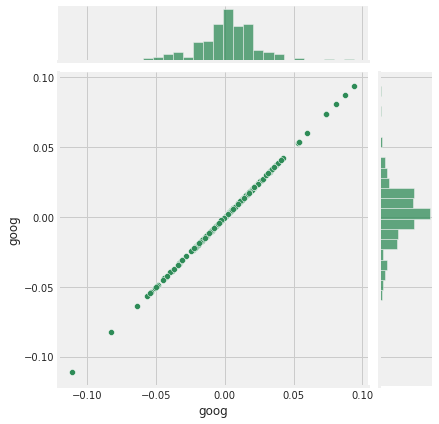

In [39]:
# compare google to itself, perfectly correlated
sns.jointplot('goog', 'goog', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


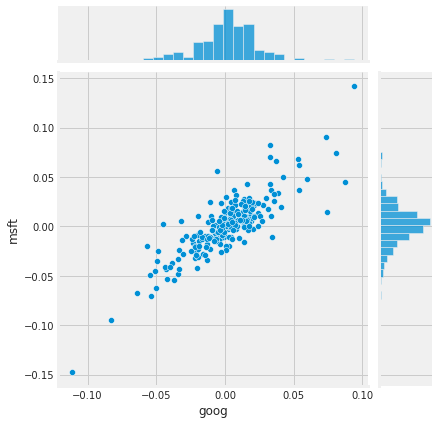

In [40]:
# plot google to microsoft
sns.jointplot('goog', 'msft', tech_rets, kind='scatter')

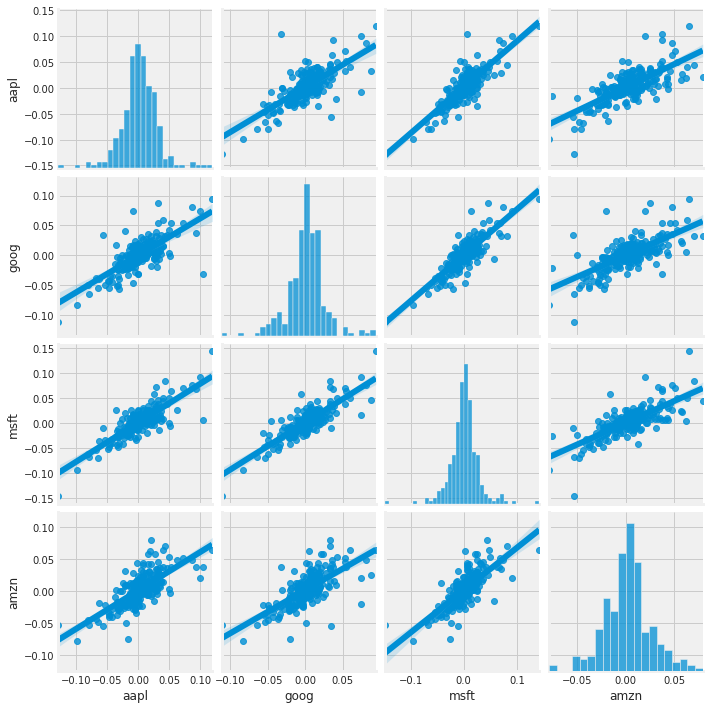

In [41]:
# draw pairplots

sns.pairplot(tech_rets, kind='reg')

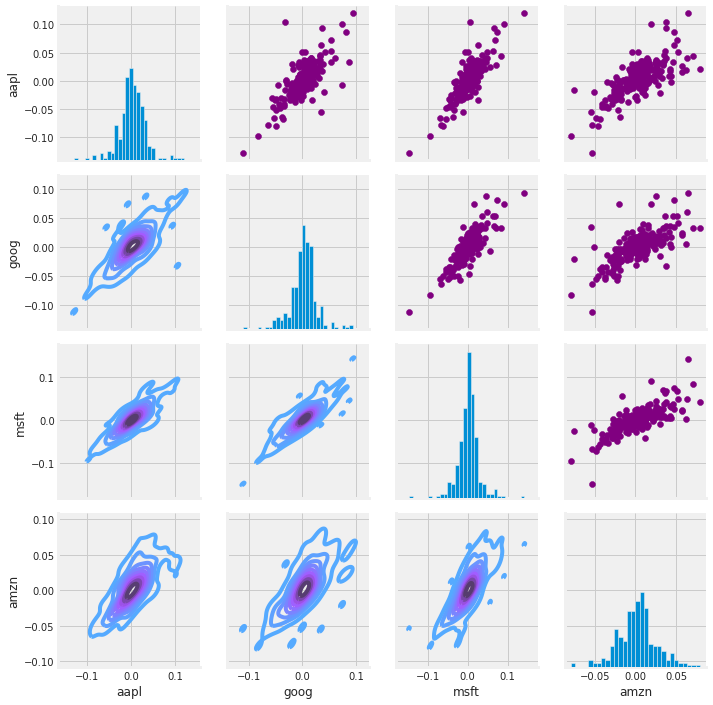

In [42]:
# can also use kdeplot and scatter
return_fig = sns.PairGrid(tech_rets.dropna())

# using map_upper to scatter graph
return_fig.map_upper(plt.scatter, color='purple')

# lower triangle as kdeplot
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# diagonal as hist plot
return_fig.map_diag(plt.hist, bins=30)

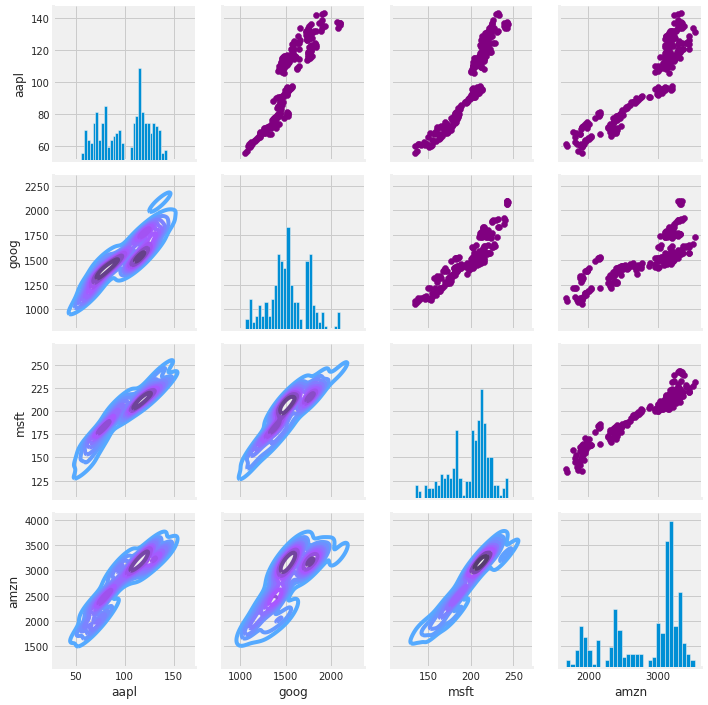

In [43]:
# use closing df
# can also use kdeplot and scatter
return_fig = sns.PairGrid(closing_df)

# using map_upper to scatter graph
return_fig.map_upper(plt.scatter, color='purple')

# lower triangle as kdeplot
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# diagonal as hist plot
return_fig.map_diag(plt.hist, bins=30)

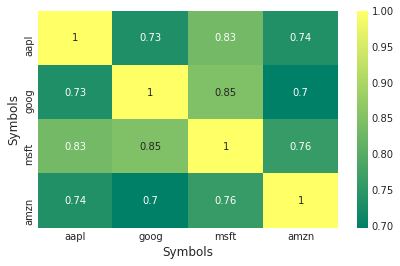

In [44]:
# can use seaborn to get correlations
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

### 5. How much value is at risk by investing, using mean and std

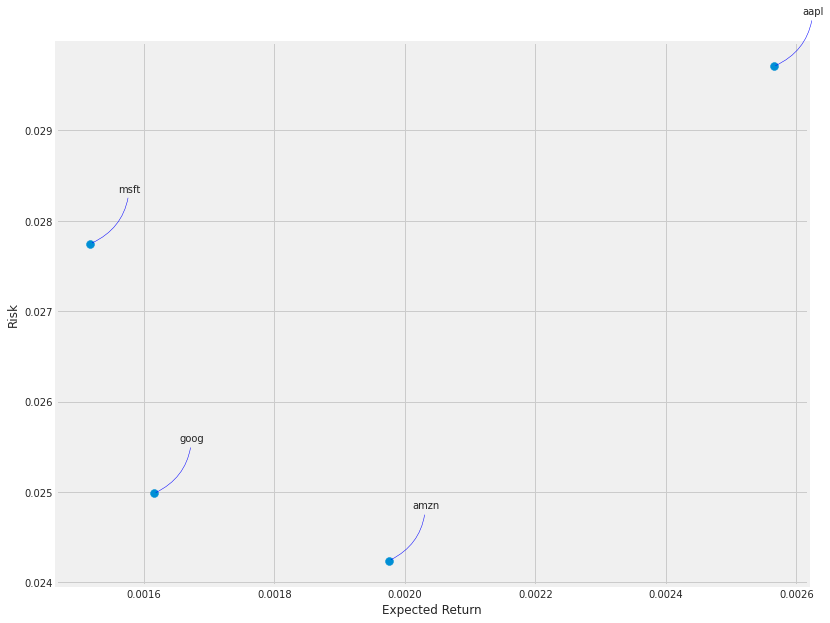

In [46]:
# define new DataFrame
rets = tech_rets.dropna()

area  = np.pi*20

plt.figure(figsize =(12,10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

### 6.Predicting stock price for APPLE

In [47]:
# get stock quote
df = DataReader('aapl', data_source='yahoo', start="2012-01-01", end=datetime.now())

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674


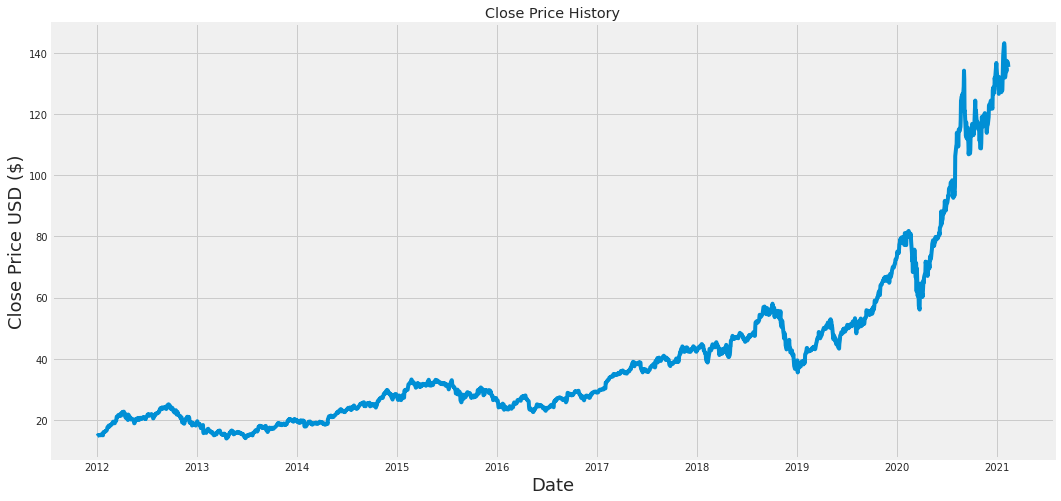

In [48]:
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [49]:
# get only close column
dataset = df['Close'].values
training_data_len = int(np.ceil(len(dataset) * .8))

training_data_len

1834

In [51]:
# scale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))

scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.95163007],
       [0.94466473],
       [0.93986647]])

In [52]:
# create training data set
train_data = scaled_data[0:int(training_data_len), :]

#split in to x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00

In [53]:
# convert into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

# reshape the data
print(x_train.shape)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

(1774, 60)


In [112]:
# we will use lstm
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping

#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model
callback = EarlyStopping(monitor='loss', patience=3)
model.fit(x_train, y_train, batch_size=1, epochs=1, callbacks=[callback])

1774/1774 [==============================] - 51s 28ms/step - loss: 4.5944e-04


In [113]:
model.output_shape

(None, 1)

In [114]:
 # create testing data set
 test_data = scaled_data[training_data_len - 60:, :]

 # create the date sets x_test and y_test
 x_test = []
 y_test = dataset[training_data_len:]
 for i in range(60, len(test_data)):
   x_test.append(test_data[i-60:i, 0])

# convert the data to a numpy array
x_test = np.array(x_test)

# reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# get prediction
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions = predictions.reshape(1, -1)[0]

# get root mean squared error
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
rmse

3.70502668864632

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


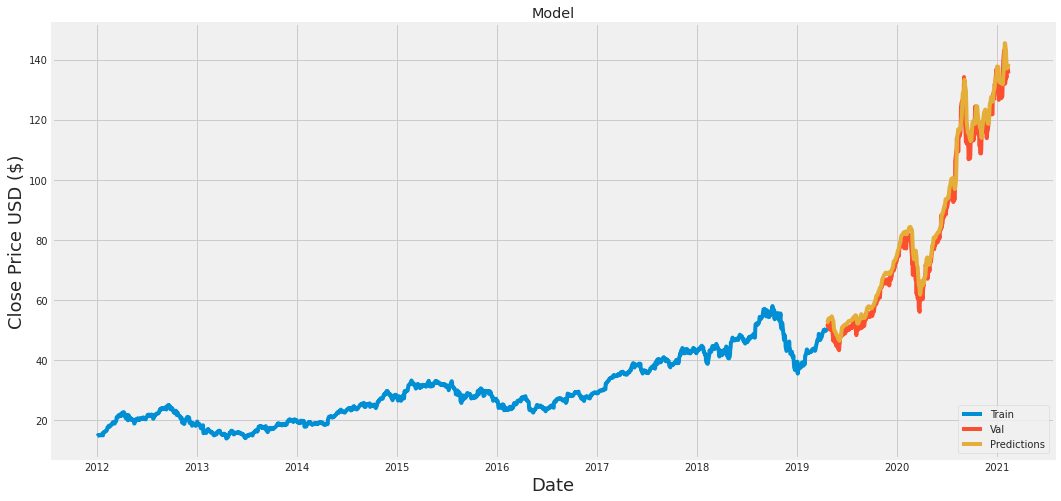

In [115]:
# Plot the data
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [116]:
# valid
pd.set_option('display.max_rows', 500)
valid

,High,Low,Open,Close,Volume,Adj Close,Predictions
Date,,,,,,,
2019-04-18,51.037498,50.630001,50.779999,50.965000,96783200.0,49.919586,52.399864
2019-04-22,51.235001,50.584999,50.707500,51.132500,77758000.0,50.083645,52.629162
2019-04-23,51.937500,50.974998,51.107498,51.869999,93292000.0,50.806026,52.908756
2019-04-24,52.119999,51.762501,51.840000,51.790001,70162400.0,50.727665,53.306213
2019-04-25,51.939999,51.279999,51.707500,51.320000,74172800.0,50.267300,53.678909
2019-04-26,51.250000,50.529999,51.224998,51.075001,74596400.0,50.027325,53.882442
2019-04-29,51.492500,50.965000,51.099998,51.152500,88818800.0,50.103237,53.912544
2019-04-30,50.849998,49.777500,50.764999,50.167500,186139600.0,49.138439,53.858162
2019-05-01,53.827499,52.307499,52.470001,52.630001,259309200.0,51.550426,53.580490
